In [44]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [45]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [46]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'Arial',
 'Bahnschrift',
 'Batang',
 'Calibri',
 'Cambria',
 'Candara',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Gabriola',
 'Gadugi',
 'Georgia',
 'Gulim',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Batang ExtB',
 'HCR Dotum',
 'HCR Dotum Ext',
 'Haan Wing2',
 'Han Santteut Dotum',
 'Hancom Gothic',
 'HancomEQN',
 'HoloLens MDL2 Assets',
 'HyhwpEQ',
 'Impact',
 'Ink Free',
 'Javanese Text',
 'Leelawadee UI',
 'Lucida Console',
 'Lucida Sans Unicode',
 'MS Gothic',
 'MV Boli',
 'Malgun Gothic',
 'Microsoft Himalaya',
 'Microsoft JhengHei',
 'Microsoft New Tai Lue',
 'Microsoft PhagsPa',
 'Microsoft Sans Serif',
 'Microsoft Tai Le',
 'Microsoft YaHei',
 'Microsoft Yi Baiti',
 'MingLiU-ExtB',
 'Mongolian Baiti',
 'Myanmar Text',
 'NewJumja',
 'Nirmala UI',
 'Palatino Linotype',
 'STIXGeneral',
 'STIXNonUnicode',
 'STI

In [47]:
mpl.rc('font', family='Malgun Gothic')

### 1-2. (1) 선발에 대한 데이터를 빼고, 투수가 2017년에 선발을 몇번 섰는지 예측하기

In [48]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)', '연봉(2018)']]

In [49]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [50]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [51]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)', '연봉(2018)']
picher_df = standard_scaling(picher, scale_columns)

In [52]:
picher_df = picher_df.rename(columns={'선발': 'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,y,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,30,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,3.912893,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,29,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,3.266495,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,31,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,6.821679,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,28,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,2.620098,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,30,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,2.975617,2.734705


In [53]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [54]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,y,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,30,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,29,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,31,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,28,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,30,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [56]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [57]:
# 학습된 계수를 출력합니다.
print(lr.coef_)

[ 1.30930186e-01 -2.86928486e-01  2.03032248e+00  4.26592850e-01
 -3.22230925e-01  7.47675859e-02  1.19208334e-01 -5.55938093e-01
 -9.91042743e-01  2.76313129e-01 -5.51007170e-01  2.55518258e-02
 -3.80301483e+00 -5.64363389e-02  1.33571269e+00 -6.43573609e-01
 -4.27379808e-01 -6.13759353e-01  8.73672490e-01  1.15937358e-01
  5.26917899e-03  4.47343734e-01 -5.12223290e-01  1.02066326e+01
  1.41342315e+00 -5.65021541e-01 -4.77741788e-01 -1.64242664e+00]


In [58]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', 'y', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성',
       '한화'],
      dtype='object')

In [59]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     171.1
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           9.12e-68
Time:                        10:57:46   Log-Likelihood:                -206.73
No. Observations:                 121   AIC:                             469.5
Df Residuals:                      93   BIC:                             547.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4117      0.128     42.308      0.000       5.158       5.666
BABIP          0.1309      0.239      0.549      0.584      -0.343       0.605
ERA           -0.2869      0.425     -0.675      0.501      -1.131       0.557
FIP            2.0303     17.387      0.117      0.907     -32.497      36.558
KIA            1.0279      0.406      2.529      0.013       0.221       1.835
KT             0.2791      0.391      0.714      0.477      -0.497       1.055
LG             0.6761      0.441      1.533      0.129      -0.200       1.552
LOB%           0.1192      0.288      0.414      0.680      -0.453       0.691
NC             0.0454      0.485      0.094      0.926      -0.917       1.008
RA9-WAR       -0.9910      0.533     -1.859      0.066      -2.050       0.068
SK             0.8776      0.411      2.136      0.035       0.062       1.694
WAR           -0.5510      0.501     -1.101      0.274      -1.545       0.443
kFIP           0.0256     14.663      0.002      0.999     -29.092      29.144
경기            -3.8030      0.374    -10.159      0.000      -4.546      -3.060
두산             0.5449      0.475      1.146      0.255      -0.399       1.489
롯데             1.9370      0.450      4.303      0.000       1.043       2.831
볼넷/9          -0.6436      1.158     -0.556      0.580      -2.944       1.656
블론            -0.4274      0.225     -1.901      0.060      -0.874       0.019
삼성            -0.0125      0.454     -0.027      0.978      -0.914       0.889
삼진/9           0.8737      1.337      0.653      0.515      -1.782       3.529
세              0.1159      0.237      0.488      0.626      -0.355       0.587
승              0.0053      0.406      0.013      0.990      -0.802       0.812
연봉(2017)       0.4473      0.430      1.041      0.300      -0.406       1.301
연봉(2018)      -0.5122      0.586     -0.874      0.384      -1.676       0.652
이닝            10.2066      0.597     17.097      0.000       9.021      11.392
패              1.4134      0.324      4.357      0.000       0.769       2.058
한화             0.0363      0.402      0.090      0.928      -0.762       0.835
홀드            -0.4777      0.297     -1.609      0.111      -1.067       0.112
홈런/9          -1.6424      3.090     -0.531      0.596      -7.779       4.494
==============================================================================
Omnibus:                        1.324   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.859
Skew:                           0.082   Prob(JB):                        0.651
Kurtosis:                       3.379   Cond. No.                     3.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '세'),
 Text(21, 0, '승'),
 Text(22, 0, '연봉(2017)'),
 Text(23, 0, '연봉(2018)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

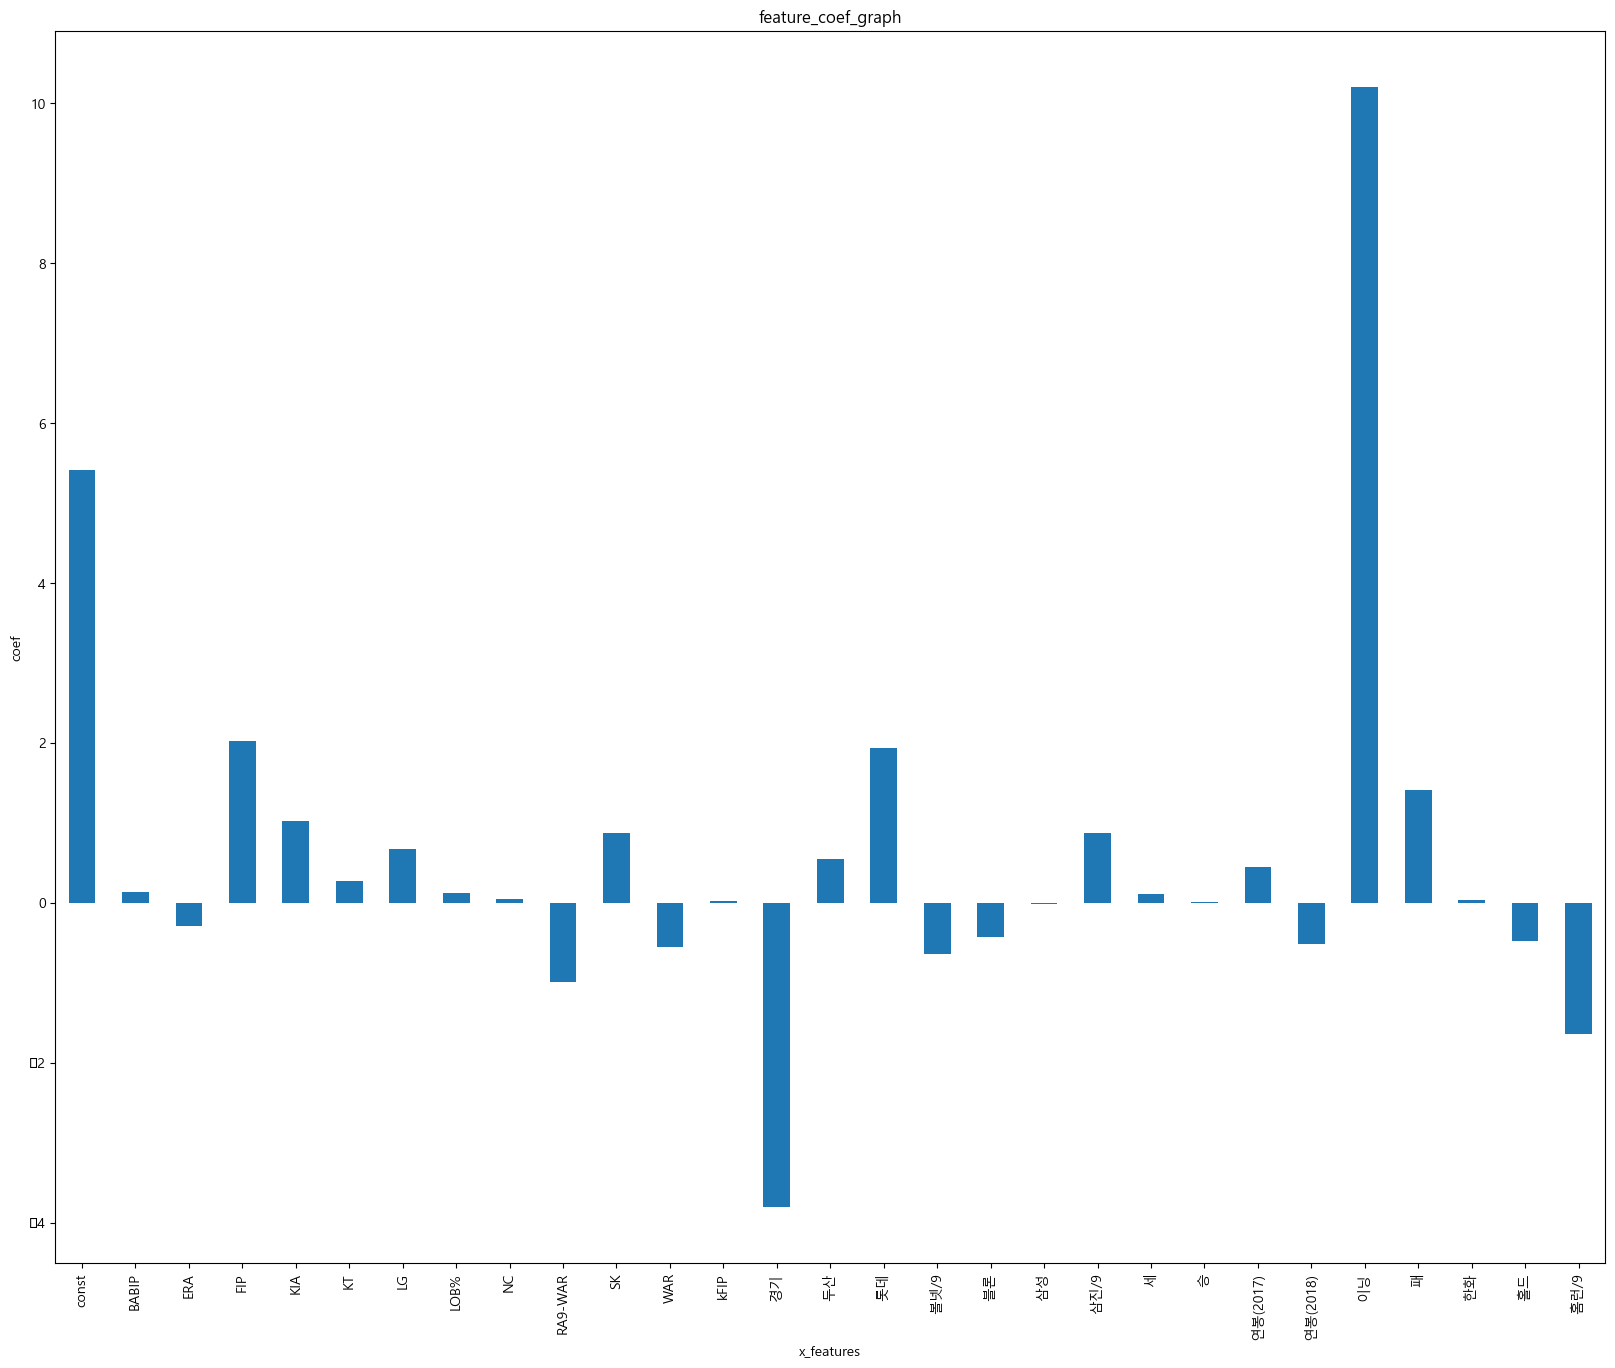

In [60]:
# 한글 출력을 위한 사전 설정 단계입니다.
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [61]:
# 피처를 재선정합니다.
X = picher_df[['FIP', '경기', '삼진/9', '이닝', '패', '홈런/9']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [62]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [63]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9709374426437087
0.9599970186230309


In [64]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

1.620951773610059
2.0864340041650973


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', '경기', '삼진/9', '이닝', '패', '홈런/9']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,7.0,FIP
1,1.4,경기
2,1.8,삼진/9
3,3.4,이닝
4,3.2,패
5,6.4,홈런/9


### 모든 투수의 이름과 2017년 예측 선발수와 2017년 실제선발수를 columns 로 가지는 df를 만들고 10개의 행 추출

In [67]:
# 선발수를 예측하여 데이터프레임의 column으로 생성합니다.
predict_선발 = lr.predict(X)
picher_df['선발(예측)'] = pd.Series(predict_선발)

In [68]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '선발']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['선발'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '선발(예측)']]
result_df.columns = ['선수명', '실제선발(2017)', '예측선발(2017)']

result_df.head(10)

,선수명,실제선발(2017),예측선발(2017)
0,양현종,31,31.396600
1,켈리,30,31.440977
2,레일리,30,31.013585
3,장원준,29,30.876522
4,문승원,29,27.781586
5,유희관,29,30.852803
6,팻딘,29,29.001203
7,소사,29,32.312553
8,윤성환,28,29.982961
9,박종훈,28,24.862221
